In [1]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#read File into Pandas DataFrame
df_Sensor = pd.read_csv(r'C:\Users\Sindhuja\Desktop\ML on ML\task\task\task_data.csv')

In [2]:
#Check the Data Frame value
df_Sensor.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [3]:
#Check the negative class values in Data Frame value
df_Sensor.tail()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
395,sample395,-1.0,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,sample396,-1.0,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,sample397,-1.0,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,sample398,-1.0,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958
399,sample399,-1.0,0.379778,0.460256,0.229257,0.768975,0.321882,0.118572,0.448964,0.546324,0.363127,0.176632


In [4]:
#just to simplify column
df_Sensor.rename({"sample index": "sample_index"},axis=1, inplace=True)

In [5]:
#Checking for available classtypes
df_Sensor['class_label'].value_counts()
df_unique_cLabel = df_Sensor['class_label'].value_counts()
df_unique_cLabel.reset_index()
df_unique_cLabel.columns = ['cLabel','count']
df_unique_cLabel

-1.0    200
 1.0    200
Name: class_label, dtype: int64

In [6]:
#Temp Works below can be ignored.
#df_sen_P = df_Sensor.loc[df_Sensor['class_label']==1]
#df_sen_N = df_Sensor.loc[df_Sensor['class_label']==-1]

#Pass a valid Class Label
def class_df_seperation (df_Full,c_label):
    df_Seperated = df_Full.loc[df_Full['class_label']==c_label]
    return df_Seperated
#calling function to seperate class '1' and '-1'
df_sen_P = class_df_seperation(df_Sensor,1)
df_sen_N = class_df_seperation(df_Sensor,-1)


In [7]:
#Checking '1' class dataframe
df_sen_P.count()

sample_index    200
class_label     200
sensor0         200
sensor1         200
sensor2         200
sensor3         200
sensor4         200
sensor5         200
sensor6         200
sensor7         200
sensor8         200
sensor9         200
dtype: int64

In [8]:
#Checking '-1' class dataframe

df_sen_N.head()

,sample_index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
200,sample200,-1.0,0.461415,0.823057,0.458469,0.879920,0.100219,0.643478,0.387758,0.512013,0.384655,0.578389
201,sample201,-1.0,0.158615,0.805215,0.825923,0.252826,0.451814,0.637244,0.436632,0.385173,0.470656,0.401134
202,sample202,-1.0,0.015053,0.161374,0.820800,0.463659,0.135061,0.409219,0.660044,0.161164,0.343768,0.558889
203,sample203,-1.0,0.254302,0.405447,0.894234,0.227233,0.130453,0.504841,0.399848,0.020323,0.111351,0.305784
204,sample204,-1.0,0.151192,0.413258,0.163459,0.356527,0.829956,0.936426,0.587276,0.620888,0.401958,0.733656


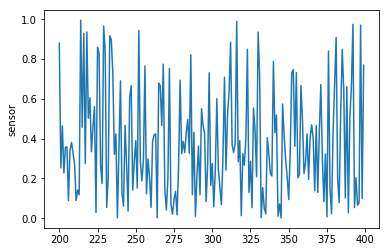

In [9]:
#Trying to understand how data is spread within single sensor readings
plt.plot(df_sen_N['sensor3'])
plt.ylabel('sensor')
plt.show()

In [10]:
#df_sen_N = df_sen_N.assign(Rank = df_sen_N["sensor0"].rank(ascending=False))
# sorting w.r.t name column 
#df_sen_N.sort_values("Rank", inplace = True) 
#df_sen_N[['sample_index','sensor0','Rank']]

def Ranking_Sensor_N(sen_type,sen_N):
    sen_N = sen_N.assign(Rank = sen_N[sen_type].rank(ascending=False))
    # sorting w.r.t Sensor Readings column
    sen_N.sort_values("Rank", inplace = True) 
    DF_Final_N=sen_N[['sample_index',sen_type,'Rank']]
    return DF_Final_N

def Ranking_Sensor_P(sen_type,sen_P):
    sen_P = sen_P.assign(Rank = sen_P[sen_type].rank(ascending=False))
    # sorting w.r.t Sensor Readings column
    sen_P.sort_values("Rank", inplace = True) 
    DF_Final_P=sen_P[['sample_index',sen_type,'Rank']]
    return DF_Final_P


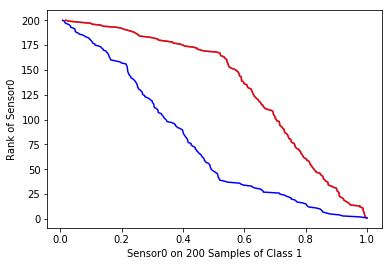

In [11]:
#Trying to understand sensor readings spread
DFN_Final = Ranking_Sensor_N("sensor0",df_sen_N)
DFP_Final = Ranking_Sensor_P("sensor0",df_sen_P)

plt.plot(DFP_Final['sensor0'],DFP_Final['Rank'])
plt.ylabel('Rank of Sensor0')
plt.xlabel('Sensor0 on 200 Samples of Class 1')
#plt.show()
x1=DFP_Final['sensor0']
x2=DFN_Final['sensor0']
y1=DFP_Final['Rank']
y2=DFN_Final['Rank']
curve1 = plt.plot(x1, y1, label="sin", color='r')
curve2 = plt.plot(x2, y2, label="sinh", color='b')
plt.show()

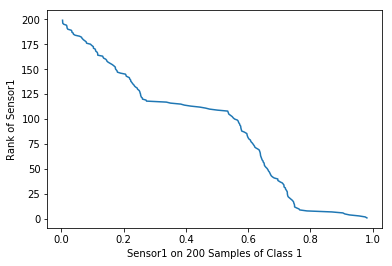

In [12]:
#Trying to understand sensor readings spread
DFN_Final = Ranking_Sensor_N("sensor1",df_sen_N)
DFP_Final = Ranking_Sensor_P("sensor1",df_sen_P)

plt.plot(DFP_Final['sensor1'],DFP_Final['Rank'])
plt.ylabel('Rank of Sensor1')
plt.xlabel('Sensor1 on 200 Samples of Class 1')
plt.show()

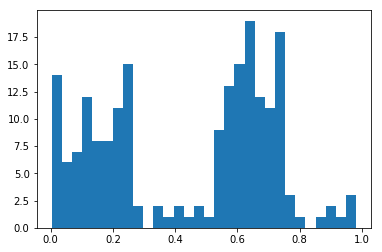

In [13]:
df_sen_roundN=df_sen_N.round({"sensor0":2,"sensor1":2,"sensor2":2,"sensor3":2,"sensor4":2,"sensor5":2,"sensor6":2,"sensor7":2,"sensor8":2,"sensor9":2})
df_sen_roundP=df_sen_P.round({"sensor0":2,"sensor1":2,"sensor2":2,"sensor3":2,"sensor4":2,"sensor5":2,"sensor6":2,"sensor7":2,"sensor8":2,"sensor9":2})
df_roundedcountsN = df_sen_roundN["sensor0"].value_counts()
df_roundedcountsN = df_roundedcountsN.reset_index()
df_roundedcountsN.columns= ["sensor1","count"]
df_roundedcountsN
#x=df_roundedcountsN["sensor0"]
x=DFP_Final['sensor1']
plt.hist(x, bins=30)
plt.show
#ploting to get the individual sensor values by rounding off the float input to 2 digits.
df_roundedcountsN.sort_values("count", inplace = True)
g = df_roundedcountsN.groupby(df_roundedcountsN["count"])

#df_all_sensor0 = (df_sen_P.iloc[:,2]>0.50).value_counts()
#df_all_sensor1 = (df_sen_P.iloc[:,3]>0.50).value_counts().append([df_all_sensor0])
#df_sen_P.iloc[:,2]

In [19]:
#From the mean value of the readings ranking sensors as per the quality of reading for most samples.
def sensor_mean_ranking(df_sen):
    ix = 0
    ix_sensors = [2,3,4,5,6,7,8,9,10,11]
    df_all_sensors = pd.DataFrame(index=[], columns=[])
    while ix < len(ix_sensors):
        col_name = ix_sensors[ix]
        df_in_sensor = (df_sen.iloc[:,col_name]>0.50).value_counts().values
        df_all_sensors = df_all_sensors.append([df_in_sensor])
        ix += 1

    df_all_sensors.set_index(0,inplace=True)
    df_all_sensors.reset_index(inplace=True)
    df_all_sensors.sort_values(0, inplace = True) 
    df_ranks = df_all_sensors.rank(ascending=False)
    df_ranks.drop(columns=1,inplace=True)
    df_ranks.sort_values(0, inplace = True) 
    df_ranks.rename (columns={0:"Rank"},inplace=True)
    print(df_ranks)

#RANKED OUTPUT OF THE SENSORS FROM 1 to 10 Index shows the sensor title and column Rank shows the respective Rank
sensor_mean_ranking(df_sen_P)


   Rank
8   1.0
0   2.0
4   3.0
3   4.0
9   5.0
1   6.0
2   7.0
5   8.5
6   8.5
7  10.0


In [20]:
#RANKED OUTPUT OF THE SENSORS FROM 1 to 10 Index shows the sensor title and column Rank shows the respective Rank
sensor_mean_ranking(df_sen_N)

   Rank
8   1.0
4   2.0
0   3.0
3   4.0
7   5.0
2   6.5
9   6.5
1   8.5
6   8.5
5  10.0
